In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [0]:
X,Y= make_blobs(n_samples=500,n_features=2,centers=2,random_state=2,shuffle=True)

In [200]:
X.shape

(500, 2)

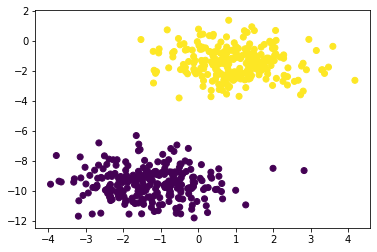

In [201]:
plt.scatter(X[:,0],X[:,1],c=Y)

In [0]:
def sigmoid(z):
  return 1.0/(1+np.exp(-z))

In [0]:
def predict(X,w):
  a=np.dot(X,w)
  #print("..shape",a.shape)
  z=sigmoid(a) #500x500
  #print("z ki shape",z.shape)
  return z

In [0]:
def grad(X,Y,Y_):
  return np.dot(X.T,Y_-Y)

In [0]:
def loss(X,Y,w):
  Y_=predict(X,w)
  #cost=np.mean(-Y*np.log(Y_)-(1-Y)*np.log(1-Y_))
  cost = np.mean(-Y*np.log(Y_) - (1-Y)*np.log(1-Y_))
  return cost

In [0]:
def update(X,Y,w,learning_rate):
  #update rule for 1 epoch
  Y_=predict(X,w) #500x500
  #print("Y_ ki shape ",Y_.shape)
  dw=grad(X,Y,Y_) #3x500
  #print("dw ki shape ",dw.shape)
  m=X.shape[0]
  w=w-learning_rate*dw/(float(m))
  #print(w.shape)
  return w

In [0]:
def train(X,Y,learning_rate=0.5,max_epochs=100):
  #instead of bias, append ones to the input
  ones=np.ones((X.shape[0],1))
  X=np.hstack((ones,X))
  print()
  w=np.zeros(X.shape[1]) #initialisation
  #print("..shape",w.shape)
  for epoch in range(max_epochs):
    w=update(X,Y,w,learning_rate)
    
    if(epoch%10)==0:
      l=loss(X,Y,w)
      print("Epoch %d  loss %.4f"%(epoch,l))
  return w

In [208]:
w=train(X,Y) #since data is linearly separable, the loss is very less


Epoch 0  loss 0.7656
Epoch 10  loss 0.1778
Epoch 20  loss 0.1320
Epoch 30  loss 0.1075
Epoch 40  loss 0.0914
Epoch 50  loss 0.0798
Epoch 60  loss 0.0708
Epoch 70  loss 0.0637
Epoch 80  loss 0.0580
Epoch 90  loss 0.0531


In [209]:
w

array([2.98127136, 1.36242652, 0.69009578])